In [1]:
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
fname = '18538612657_ACTIVITY'

In [3]:
# read from csv
values = pd.read_csv(f'./output/activities/runs/{fname}_values.csv')
units = pd.read_csv(f'./output/activities/runs/{fname}_units.csv')

In [4]:
# add features
values['pace'] = 1 / (values['enhanced_speed'] / 1609.34) / 60
units['pace'] = 'minutes per mile'

# values.loc[values['pace'] != np.inf, 'pace dt'] = values.loc[values['pace'] != np.inf, 'pace'].apply(lambda x: pd.datetime(2020, 1, 1, 0, int(np.floor(x)), int((x - np.floor(x)) * 60)))
values.loc[values['pace'] != np.inf, 'pace dt'] = values.loc[values['pace'] != np.inf, 'pace'].apply(lambda x: datetime(2020, 1, 1, 0, int(np.floor(x)), int((x - np.floor(x)) * 60)))
units['pace dt'] = 'minutes per mile'

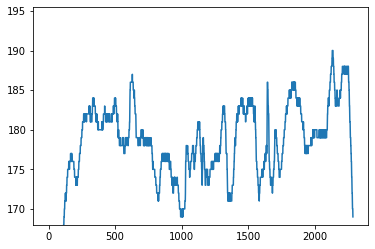

In [5]:
fig, ax = plt.subplots()
ax.plot(values['heart_rate'])
zoom = True
if zoom:
    ax.set_ylim(np.percentile(values['heart_rate'], 5))
plt.show()

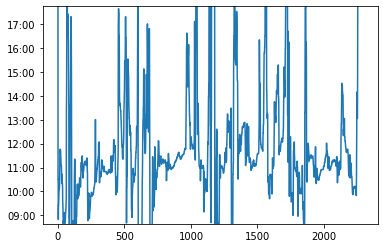

In [6]:
fig, ax = plt.subplots()
ax.plot(values['pace dt'])
zoom = True
if zoom:
    ax.set_ylim(np.percentile(values['pace dt'], [5, 95]))

# reformat y axis
date_format = mdates.DateFormatter('%M:%S')
ax.yaxis.set_major_formatter(date_format)

# set y tickets every minute
ax.yaxis.set_major_locator(mdates.MinuteLocator(interval = 1))

plt.show()